In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
!pip freeze

absl-py==0.7.0
alembic==1.0.8
asn1crypto==0.24.0
astor==0.7.1
async-generator==1.10
atari-py==0.1.7
attrs==19.1.0
backcall==0.1.0
beautifulsoup4==4.7.1
bleach==3.1.0
bokeh==1.0.4
box2d-py==2.3.8
certifi==2019.3.9
cffi==1.12.2
chardet==3.0.4
Click==7.0
cloudpickle==0.8.0
colorlover==0.3.0
conda==4.6.8
cryptography==2.5
cufflinks==0.15
cycler==0.10.0
Cython==0.29.6
cytoolz==0.9.0.1
dask==1.2.0
decorator==4.3.2
defusedxml==0.5.0
dill==0.2.9
distributed==1.26.0
EasyProcess==0.2.5
elasticsearch==7.0.0
eli5==0.8.2
entrypoints==0.3
Faker==1.0.5
fastcache==1.0.2
future==0.17.1
gast==0.2.2
gmpy2==2.0.8
google-pasta==0.1.5
graphviz==0.10.1
grpcio==1.16.1
gym==0.12.1
h5py==2.9.0
heapdict==1.0.0
idna==2.8
imageio==2.5.0
ipykernel==5.1.0
ipython==7.3.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.13.3
Jinja2==2.10
joblib==0.12.5
JSAnimation==0.1
jsonschema==3.0.1
jupyter-client==5.2.4
jupyter-core==4.4.0
jupyterhub==0.9.4
jupyterlab==0.35.4
jupyterlab-server==0.2.0
Keras==2.2.4
Keras-Applicati

In [37]:
#create a dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('../output/procedure_costs.csv')

In [38]:
df.head()

service_date  procedure_code  \
0   2018-03-29           93000   
1   2018-11-25           45738   
2   2018-10-18           95811   
3   2018-01-31           97110   
4   2018-11-30           80061   

                                           procedure  \
0  Routine EKG using 12 leads including interpret...   
1                Diagnostic and Flexible colonoscopy   
2           Sleep study to begin treatment with CPAP   
3                      Physical therapy - 15 minutes   
4                                        Lipid panel   

                      provider          insurer          plan plan_tier  \
0         St Matthews Hospital          Everest   8 Neck Plan      Gold   
1              Yourtown Clinic          Everest  3 Lodge Plan  Platinum   
2  Plummer & Mayonnaise Clinic  Divided Illness   3 Lane Plan    Bronze   
3         St Matthews Hospital  Prosaic Discord  4 Trail Plan  Platinum   
4        Costello Southeastern          Everest   8 Neck Plan    Silver   

   provider_charge  allowed_charge  out_of_pocket  insurance_paid  
0            94.83           76.60          15.32           61.28  
1           856.52          227.49          22.75          204.74  
2           901.13          289.53         115.81          173.72  
3            71.94           45.80           4.58           41.22  
4            86.45           69.19          20.76           48.43

In [3]:
df.describe()

provider_charge  allowed_charge  out_of_pocket  insurance_paid
count    100000.000000   100000.000000  100000.000000   100000.000000
mean      10659.747321     3832.620684    2874.874438      957.746245
std        6145.215897     2312.326365    1804.373319      765.006731
min        1022.500000      276.080000     165.648000       27.608000
25%        5103.250000     1812.820000    1320.480000      350.094000
50%       12205.220000     4153.090000    3001.427500      757.165000
75%       14845.500000     5476.090000    4131.504000     1463.646000
max       25475.610000    11464.020000   10317.618000     4585.608000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
service_date       100000 non-null object
procedure          100000 non-null object
provider           100000 non-null object
insurer            100000 non-null object
plan               100000 non-null object
plan_tier          100000 non-null object
provider_charge    100000 non-null float64
allowed_charge     100000 non-null float64
out_of_pocket      100000 non-null float64
insurance_paid     100000 non-null float64
dtypes: float64(4), object(6)
memory usage: 7.6+ MB


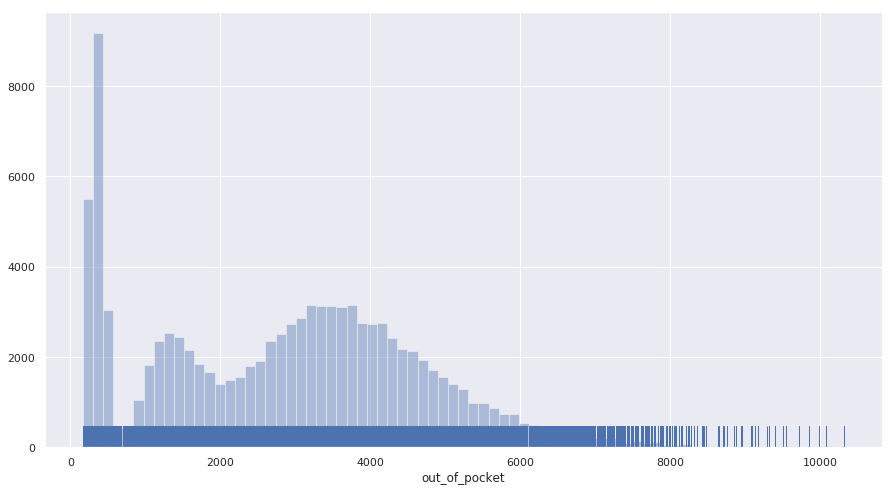

In [87]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
_ = sns.distplot(df['out_of_pocket'], kde=False, rug=True, bins=75)

In [90]:
# Use the .jointplot() method with the kind parameter to adjust plot
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


def f(var):
    plt.figure(figsize=(15,8))
    with sns.axes_style("white"):
        sns.jointplot(x='out_of_pocket', y='allowed_charge', data=df, kind=var, color='k')
    plt.show()

_ = interact(f, var = ['scatter','reg', 'hex', 'kde'])

interactive(children=(Dropdown(description='var', options=('scatter', 'reg', 'hex', 'kde'), value='scatter'), …

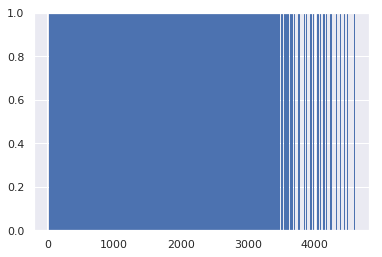

In [83]:
_=sns.rugplot(df['insurance_paid'], height=5)

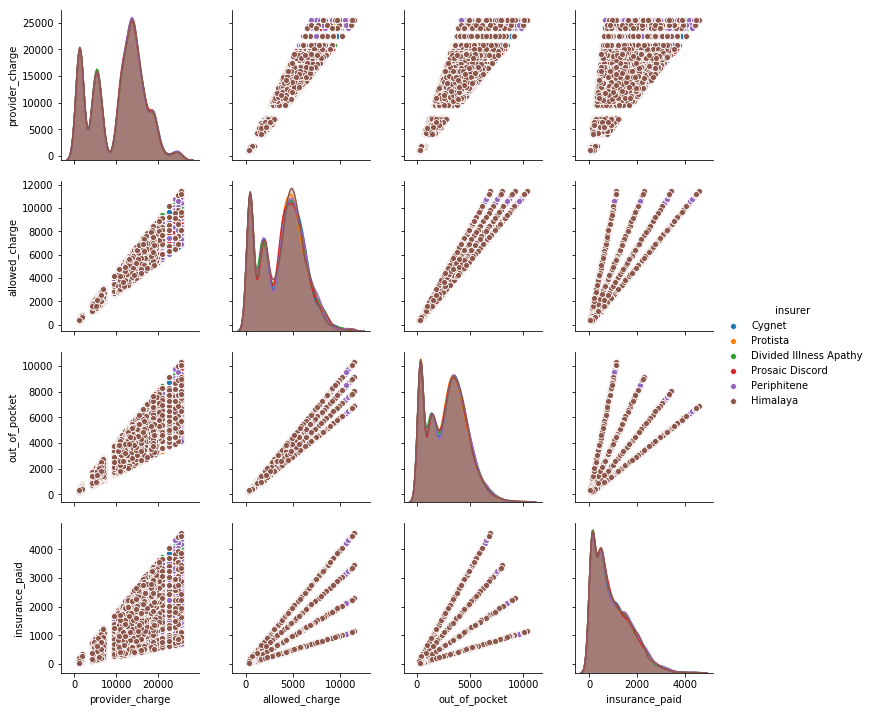

In [33]:
_= sns.pairplot(df, hue='insurer') #, palette='coolwarm')

In [92]:
#plt.figure(figsize=(30,30))
#sns.set()
#ax = plt.figure(figsize=(10, 15))
_= sns.catplot(x="allowed_charge", y="insurer", data=df, height=7, aspect=2, kind='boxen');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

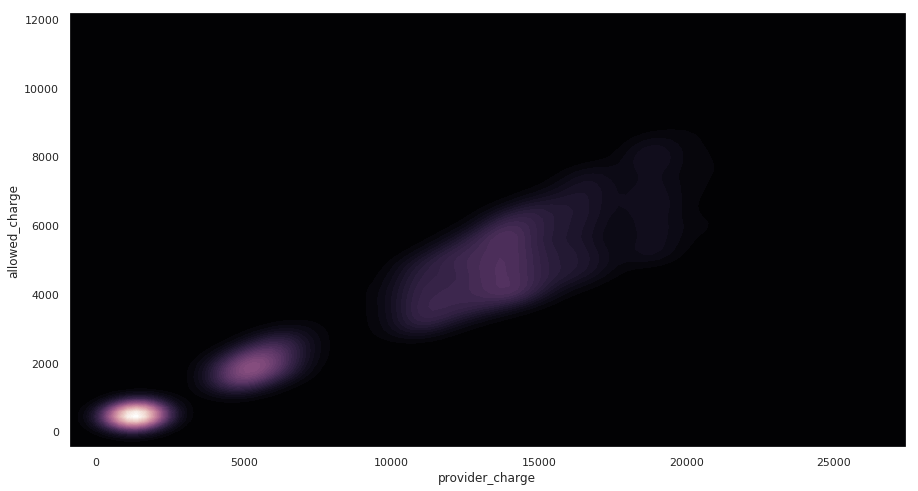

In [94]:
plt.figure(figsize=(15,8))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.provider_charge, df.allowed_charge, cmap=cmap, n_levels=60, shade=True);

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
df2 = pd.read_csv('../data/iris.csv')

In [10]:
df2.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [11]:
df2.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

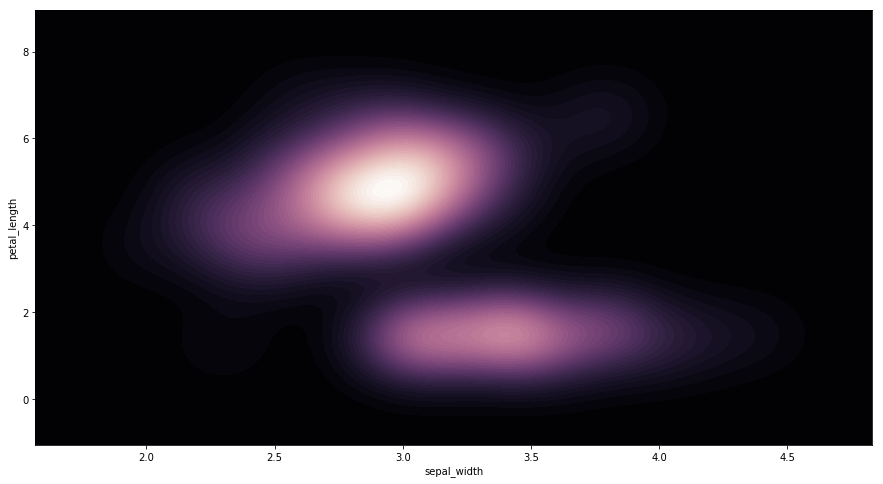

In [12]:
plt.figure(figsize=(15,8))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df2.sepal_width, df2.petal_length, cmap=cmap, n_levels=60, shade=True);

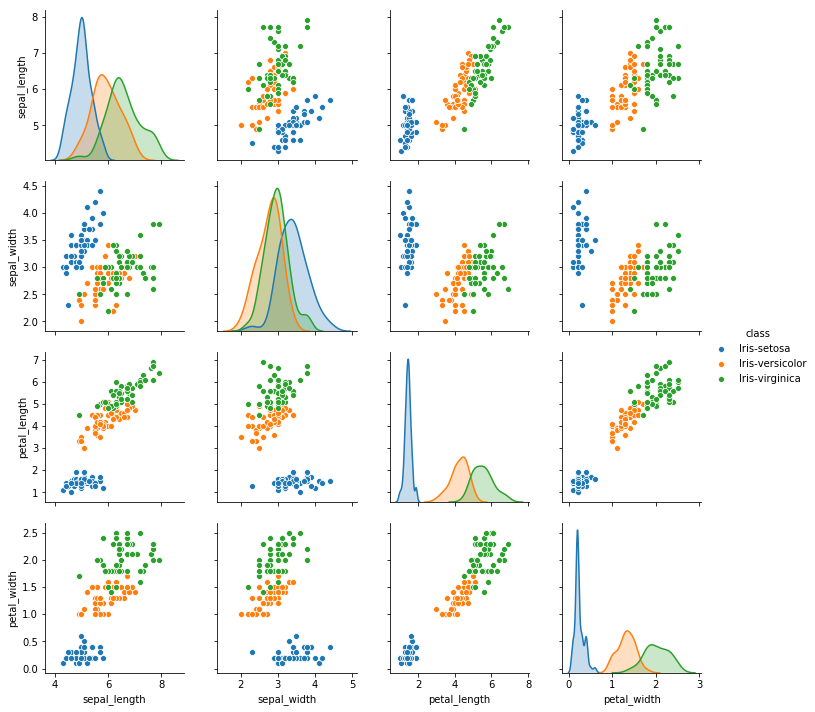

In [13]:
sns.pairplot(df2, hue='class') 

In [14]:
def f(var):
    plt.figure(figsize=(15,8))
    with sns.axes_style("white"):
        sns.distplot(df2[var], kde=False, rug=True, bins=3)
    plt.show()

_ = interact(f, var = ['sepal_length','sepal_width', 'petal_length', 'petal_width'])


interactive(children=(Dropdown(description='var', options=('sepal_length', 'sepal_width', 'petal_length', 'pet…

In [15]:
def f(var):
    plt.figure(figsize=(15,8))
    with sns.axes_style("white"):
        sns.jointplot(x='sepal_width', y='petal_length', data=df2, kind=var)
    plt.show()

_ = interact(f, var = ['scatter','reg', 'hex', 'kde'])

interactive(children=(Dropdown(description='var', options=('scatter', 'reg', 'hex', 'kde'), value='scatter'), …

In [16]:
# @hidden_cell
def f(var1, var2):
    plt.figure(figsize=(15,8))
    with sns.axes_style("whitegrid"):
        sns.scatterplot(df2[var1], df2[var2],hue=df2['class'], style=df2['class'])
    plt.show()

_ = interact(f, var1 = ['sepal_length','sepal_width', 'petal_length', 'petal_width'],
                var2 = ['sepal_width','sepal_length', 'petal_length', 'petal_width'])

interactive(children=(Dropdown(description='var1', options=('sepal_length', 'sepal_width', 'petal_length', 'pe…

In [5]:
import pandas as pd
data = [['feather', 9, 13],
        ['lead', 23, 67],
        ['feather', 13, 18]]

In [8]:
df = pd.DataFrame(data, columns=['name', 'mass', 'impact'])

In [10]:
df

name  mass  impact
0  feather     9      13
1     lead    23      67
2  feather    13      18

In [14]:
summary = df.groupby(['name']).agg(
            {
                'mass' : ["count"]
            }
)

In [22]:
new_cols = {'name' : 'Object', ('mass','count') : 'Count'}
new_cols
#summary.rename(index=str, columns=new_cols)

{'name': 'Object', ('mass', 'count'): 'Count'}

In [16]:
type(summary)

pandas.core.frame.DataFrame

In [23]:
summary[('mass','count')]

name
feather    2
lead       1
Name: (mass, count), dtype: int64

In [31]:
new_cols = [''.join(t) for t in summary.columns]


In [32]:
new_cols

['masscount']

In [33]:
summary.columns = new_cols

In [34]:
summary

masscount
name              
feather          2
lead             1

In [35]:
summary['masscount']

name
feather    2
lead       1
Name: masscount, dtype: int64

In [ ]:
colors = ["#006D2C", "#31A354","#74C476"]
pivot_df = df.pivot(index='Year', columns='Month', values='Value')
pivot_df

In [36]:
df

name  mass  impact
0  feather     9      13
1     lead    23      67
2  feather    13      18